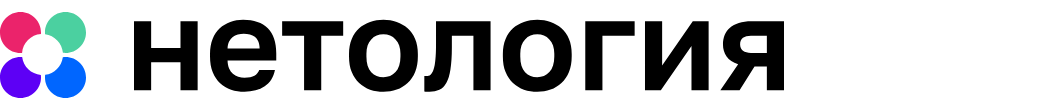

## Домашнее задание "Финальное"

Закрепляем и отрабатываем все знания, полученные на курсе! Для работы используйте набор данных по [ссылке](https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/ML_2/possum.csv).

Описание датасета:
- case: observation number
- site: The site number where the possum was trapped.
- Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland).
- sex: Gender, either m (male) or f (female).
- age: Age.
- hdlngth: Head length, in mm.
- skullw: Skull width, in mm.
- totlngth: Total length, in cm.
- taill: Tail length, in cm.
- footlgth: foot length
- earconch: ear conch length
- eye: distance from medial canthus to lateral canthus of right eye
- chest: chest girth (in cm)
- belly: belly girth (in cm)

Для выполнения задания:
- Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
- Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html))
- Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
- Постройте модель LDA
- Рассчитайте точность вашей модели на тестовой выборке

#### Примечание
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1) Что я делаю?
2) Какого результата я ожидаю?
3) Как фактический результат отличается от ожидаемого?
4) Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Global YouTube Statistics.csv", encoding='unicode_escape')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from numpy import NaN

<Axes: xlabel='video views', ylabel='subscribers'>

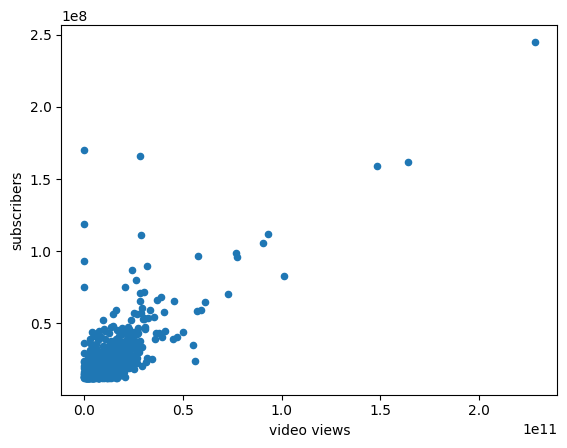

In [5]:
df.plot(kind='scatter', 
        x='video views', 
        y='subscribers')

In [6]:
# линейная регрессия - предсказание кол-ва подписчиков от кол-ва просмотров

df[['video views', 'subscribers']].corr()

,video views,subscribers
video views,1.000000,0.750958
subscribers,0.750958,1.000000


In [8]:
df = df.loc[(df['video views'] > 0)]
x = df[['video views']]
y = df['subscribers']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f"Точность модели на тестовой выборке {round(model.score(x_test, y_test) * 100)}%")

Точность модели на тестовой выборке 66%


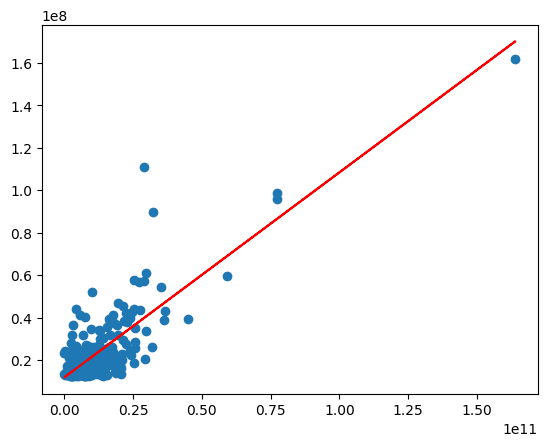

In [10]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [17]:
df = df.loc[~(df['Country'].isna())]
df = df.loc[~(df['created_year'].isna())]

In [18]:
categories_to_select = ['Entertainment', 'Music', 'People & Blogs']
df2 = df[df['category'].isin(categories_to_select)]

In [19]:
le = LabelEncoder()
X = df2[['video views','subscribers', 'created_year', 'category']]
X = X.loc[(X['video views'] > 0)]
del X['category']

In [20]:
le = LabelEncoder()
le.fit(df2['category'])
y = pd.Series(data = le.transform(df2['category']))

In [21]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Точность тестовой выборки: {round(model.score(X_test, y_test) * 100)}%")

Точность тестовой выборки: 43%
